# Import Libraries

In [636]:
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

# Load Dataset

In [3]:
# Directories
data_dir = '../data'
raw_data_dir = f'{data_dir}/raw'

# Dataset name and path
dataset_name = 'mudah_apartment_kl_selangor.csv'
dataset_path = f'{raw_data_dir}/{dataset_name}'

# Load dataframe
df = pd.read_csv(dataset_path)

# Initial Review

### Dimensions
rows, cols

In [6]:
df.shape

(19991, 14)

### Head
First few records

In [8]:
df.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


### Features
There are 14 features with one unique ID (ads_id) and one target feature (monthly_rent).
| No | Feature | Description | Type |
| - | - | - | - |
| 1 | `ads_id` | the listing ids (unique) | Categorical |
| 2 | `prop_name` | name of the building/property | Categorical |
| 3 | `completion_year` | completion/ established year of the property | Numerical |
| 4 | `monthly_rent` | monthly rent in ringgit malaysia (RM) | Numerical |
| 5 | `location` | property location in Kuala Lumpur region | Categorical |
| 6 | `property_type` | property type such as apartment, condominium, flat, duplex, studio, etc | Categorical |
| 7 | `rooms` | number of rooms in the unit | Numerical |
| 8 | `parking` | number of parking space for the unit | Numerical |
| 9 | `bathroom` | number of bathrooms in the unit | Numerical | Numerical |
| 10 | `size` | total area of the unit in square feet | Numerical |
| 11 | `furnished` | furnishing status of the unit (fully, partial, non-furnished) | Categorical |
| 12 | `facilities` | main facilities available | Categorical (to split into Binary) |
| 13 | `additional_facilities` | additional facilities (proximity to attraction area, mall, school, shopping, railways, etc) | Categorical (to split into Binary) |
| 14 | `region` | Kuala Lumpur or Selangor | Categorical |

In [10]:
list(df.columns)

['ads_id',
 'prop_name',
 'completion_year',
 'monthly_rent',
 'location',
 'property_type',
 'rooms',
 'parking',
 'bathroom',
 'size',
 'furnished',
 'facilities',
 'additional_facilities',
 'region']

### Data Types

In [11]:
df.dtypes

ads_id                     int64
prop_name                 object
completion_year          float64
monthly_rent              object
location                  object
property_type             object
rooms                     object
parking                  float64
bathroom                 float64
size                      object
furnished                 object
facilities                object
additional_facilities     object
region                    object
dtype: object

### Missing Values

In [40]:
df.isna().sum()

ads_id                      0
prop_name                 948
completion_year          9185
monthly_rent                2
location                    0
property_type               0
rooms                       6
parking                  5702
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64

### Unique Values

In [692]:
print(f'prop_name: {len(df['prop_name'].nunique())}')
print(f'completion_year: {len(df['completion_year'].unique())}')
print(f'location: {len(df['location'].unique())}')
print(f'property_type: {len(df['property_type'].unique())}')
print(f'rooms: {len(df['rooms'].unique())}')
print(f'parking: {len(df['parking'].unique())}')
print(f'bathroom: {len(df['bathroom'].unique())}')
print(f'size: {len(df['size'].unique())}')
print(f'furnished: {len(df['furnished'].unique())}')
print(f'facilities: {len(df['facilities'].unique())}')
print(f'additional_facilities: {len(df['additional_facilities'].unique())}')
print(f'region: {len(df['region'].unique())}')

prop_name: 2826
completion_year: 43
location: 134
property_type: 13
rooms: 19
parking: 10
bathroom: 9
size: 1215
furnished: 4
facilities: 10786
additional_facilities: 177
region: 2


In [39]:
#print(f'prop_name: {df['prop_name'].unique()}')
print(f'\ncompletion_year: {df['completion_year'].unique()}')
#print(f'\nlocation: {df['location'].unique()}')
print(f'\nproperty_type: {df['property_type'].unique()}')
print(f'\nrooms: {df['rooms'].unique()}')
print(f'\nparking: {df['parking'].unique()}')
print(f'\nbathroom: {df['bathroom'].unique()}')
print(f'\nsize: {df['size'].unique()}')
print(f'\nfurnished: {df['furnished'].unique()}')
#print(f'\nfacilities: {df['facilities'].unique()}')
#print(f'\nadditional_facilities: {df['additional_facilities'].unique()}')
print(f'\nregion: {df['region'].unique()}')


completion_year: [2022.   nan 2020. 2018. 2014. 2019. 2017. 2021. 2006. 2015. 1999. 2004.
 2007. 2002. 1985. 2010. 2012. 1988. 1998. 2023. 1990. 2016. 2003. 2000.
 2008. 1995. 2013. 2011. 1994. 2009. 1996. 2005. 1993. 1997. 2001. 2025.
 1980. 1989. 1987. 1984. 2024. 1991. 1977.]

property_type: ['Condominium' 'Apartment' 'Service Residence' 'Studio' 'Flat' 'Duplex'
 'Others' 'Townhouse Condo'
 'Condo / Services residence / Penthouse / Townhouse' 'Residential'
 'Bungalow House' 'Houses' 'Soho']

rooms: ['5' '3' '2' '1' '4' '7' '6' 'More than 10' nan '9' '3.0' '4.0' '2.0'
 '1.0' '5.0' '9.0' '6.0' '7.0' '10.0']

parking: [ 2.  1. nan  3. 10.  5.  4.  9.  6.  7.]

bathroom: [ 6.  2.  1.  3.  5.  4.  7. nan  8.]

size: ['1842 sq.ft.' '1170 sq.ft.' '650 sq.ft.' ... '489 sq.ft.' '941 sq.ft.'
 '1261 sq.ft.']

furnished: ['Fully Furnished' 'Partially Furnished' 'Not Furnished' nan]

region: ['Kuala Lumpur' 'Selangor']


In [38]:
print(f'prop_name: {df['prop_name'].unique()}')
print(f'\nlocation: {df['location'].unique()}')
print(f'\nfacilities: {df['facilities'].unique()}')
print(f'\nadditional_facilities: {df['additional_facilities'].unique()}')

prop_name: ['The Hipster @ Taman Desa' 'Segar Courts' 'Pangsapuri Teratak Muhibbah 2'
 ... 'Pangsapuri Desa Mas Taman Desa Mas Bandar Country Homes'
 'Pangsapuri Meru Ehsan' 'Residensi Lili']

location: ['Kuala Lumpur - Taman Desa' 'Kuala Lumpur - Cheras'
 'Kuala Lumpur - Sentul' 'Kuala Lumpur - Mont Kiara'
 'Kuala Lumpur - Setapak' 'Kuala Lumpur - Ampang'
 'Kuala Lumpur - Segambut' 'Kuala Lumpur - Desa ParkCity'
 'Kuala Lumpur - Bukit Jalil' 'Kuala Lumpur - Kepong'
 'Kuala Lumpur - KL City' 'Kuala Lumpur - Wangsa Maju'
 'Kuala Lumpur - Solaris Dutamas' 'Kuala Lumpur - Jalan Kuching'
 'Kuala Lumpur - Bandar Menjalara' 'Kuala Lumpur - Desa Pandan'
 'Kuala Lumpur - Old Klang Road' 'Kuala Lumpur - KLCC'
 'Kuala Lumpur - Ampang Hilir' 'Kuala Lumpur - Bukit Bintang'
 'Kuala Lumpur - Jalan Ipoh' 'Kuala Lumpur - Setiawangsa'
 'Kuala Lumpur - Gombak' 'Kuala Lumpur - Pantai'
 'Kuala Lumpur - Sungai Besi' 'Kuala Lumpur - Jinjang'
 'Kuala Lumpur - Sri Petaling' 'Kuala Lumpur - Bangsar South'
 'Ku

### Duplicates

In [55]:
# Listing ID (ads_id) must be unique
total_rows = len(df)
unique_rows = df['ads_id'].nunique()

print(f'Number of rows: {len(df)}')
print(f'Number of unique rows: {df['ads_id'].nunique()}')
print(f'Number of duplicates: {total_rows - unique_rows}')

Number of rows: 19991
Number of unique rows: 19978
Number of duplicates: 13


### Statistical Summary

In [34]:
df.describe()

,ads_id,completion_year,parking,bathroom
count,1.999100e+04,10806.000000,14289.000000,19985.000000
mean,9.970671e+07,2014.822321,1.416824,1.891719
std,3.482575e+06,6.735355,0.567368,0.556266
min,1.652551e+07,1977.000000,1.000000,1.000000
25%,9.984012e+07,2012.000000,1.000000,2.000000
50%,1.002127e+08,2017.000000,1.000000,2.000000
75%,1.006179e+08,2020.000000,2.000000,2.000000
max,1.008546e+08,2025.000000,10.000000,8.000000


## Initial Analysis

In [609]:
def plot_barv(data, title, xlabel, ylabel, width=10, height=6):
    plt.figure(figsize=(width, height))
    data.plot(kind='bar', title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_barh(data, title, xlabel, ylabel, width=10, height=6):
    plt.figure(figsize=(width, height))
    data.plot(kind='barh', title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_scatter(data, title, xlabel, ylabel, width=10, height=6):
    plt.figure(figsize=(width, height))
    data.plot.scatter(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Property Distribution

`completion_year`

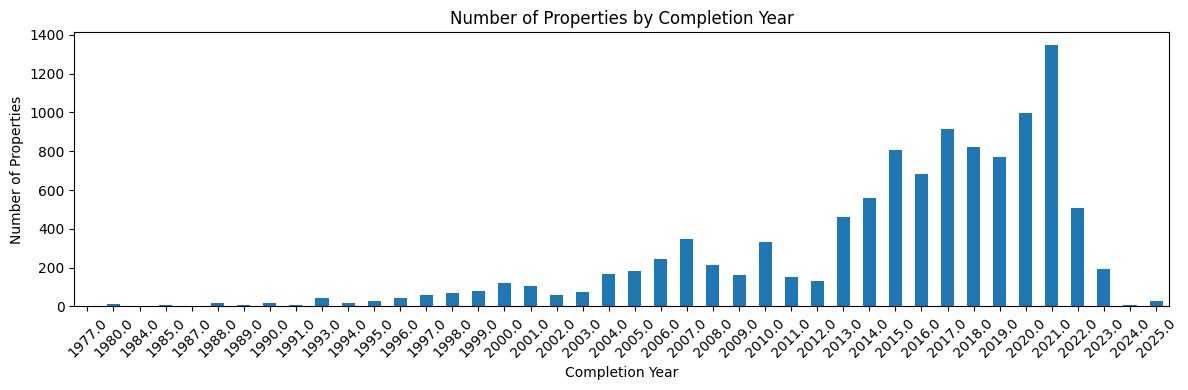

In [375]:
property_counts = df['completion_year'].value_counts().sort_index()
plot_barv(property_counts, 'Number of Properties by Completion Year', 'Completion Year', 'Number of Properties', 12, 4)

`location`

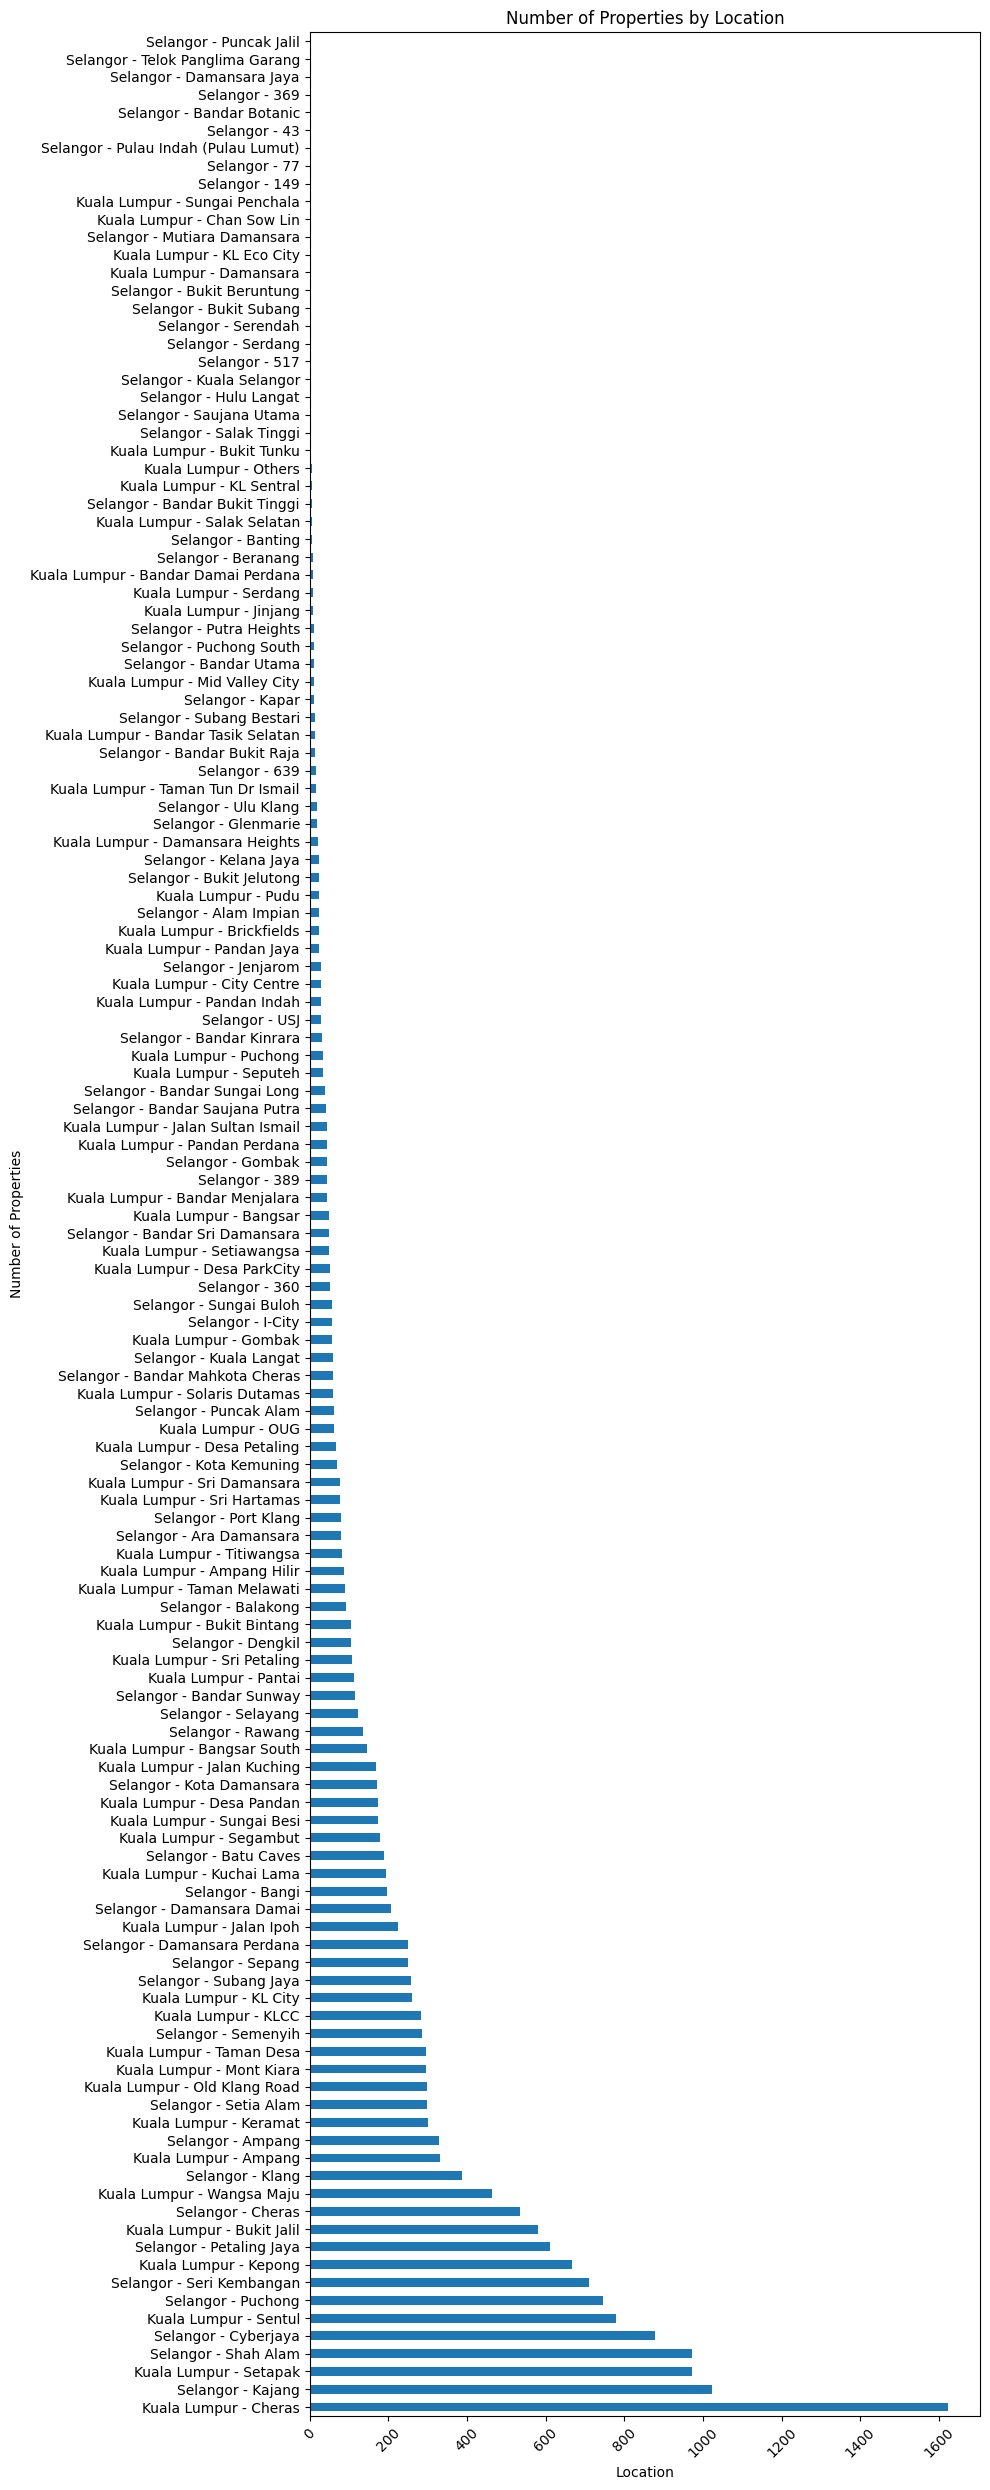

In [704]:
property_counts = df['location'].value_counts()
plot_barh(property_counts, 'Number of Properties by Location', 'Location', 'Number of Properties', 10, 25)

`property_type`

Findings: can combine categories with only 1 row into "Others" category

property_type
Condominium                                           8448
Service Residence                                     5310
Apartment                                             5258
Flat                                                   581
Studio                                                 189
Others                                                  89
Duplex                                                  76
Townhouse Condo                                         35
Condo / Services residence / Penthouse / Townhouse       1
Residential                                              1
Bungalow House                                           1
Houses                                                   1
Soho                                                     1
Name: count, dtype: int64


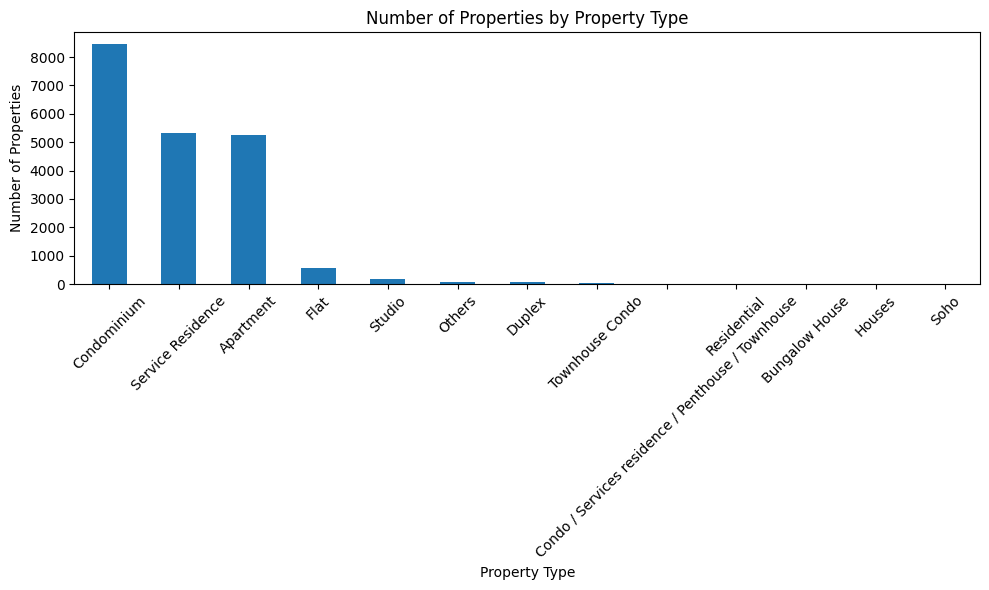

In [377]:
property_counts = df['property_type'].value_counts()
print(property_counts)
plot_barv(property_counts, 'Number of Properties by Property Type', 'Property Type', 'Number of Properties', 10, 6)

`rooms`

rooms
1                867
1.0             1527
10.0               1
2               1805
2.0             1489
3               6320
3.0             6460
4                915
4.0              474
5                 54
5.0               38
6                 19
6.0                4
7                  6
7.0                2
9                  1
9.0                1
More than 10       2
Name: count, dtype: int64


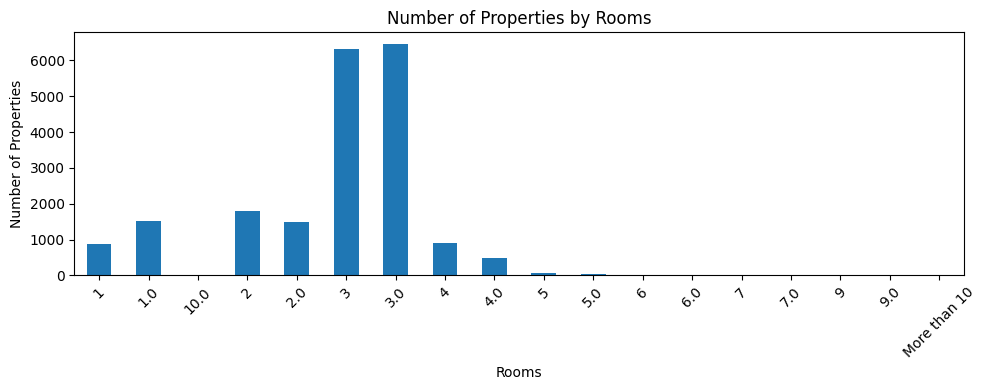

In [378]:
property_counts = df['rooms'].value_counts().sort_index()
print(property_counts)
plot_barv(property_counts, 'Number of Properties by Rooms', 'Rooms', 'Number of Properties', 10, 4)

`parking`

parking
1.0     8644
2.0     5427
3.0      179
4.0       23
5.0        6
6.0        2
7.0        1
9.0        1
10.0       6
Name: count, dtype: int64


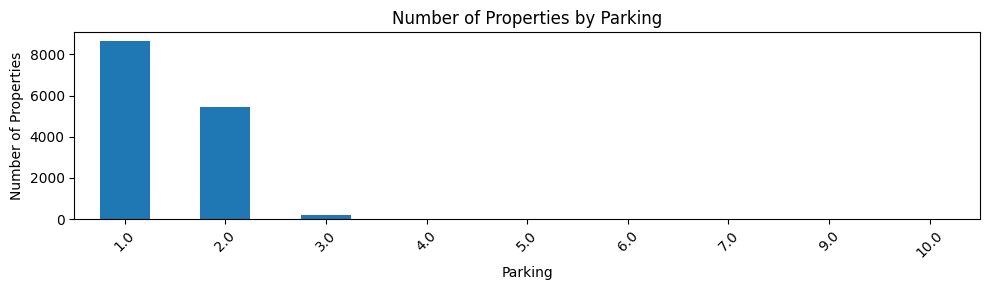

In [381]:
property_counts = df['parking'].value_counts().sort_index()
print(property_counts)
plot_barv(property_counts, 'Number of Properties by Parking', 'Parking', 'Number of Properties', 10, 3)

`bathroom`

bathroom
1.0     3800
2.0    14887
3.0     1065
4.0      160
5.0       54
6.0        9
7.0        7
8.0        3
Name: count, dtype: int64


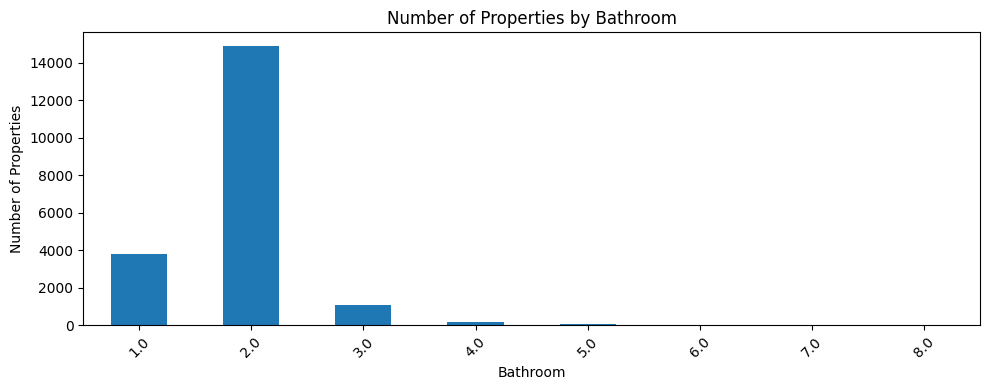

In [383]:
property_counts = df['bathroom'].value_counts().sort_index()
print(property_counts)
plot_barv(property_counts, 'Number of Properties by Bathroom', 'Bathroom', 'Number of Properties', 10, 4)

`furnished`

furnished
Fully Furnished        8462
Not Furnished          3520
Partially Furnished    8004
Name: count, dtype: int64


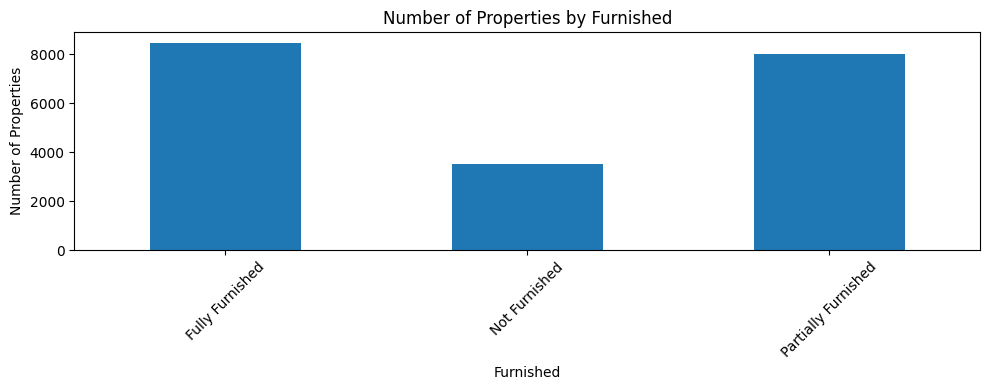

In [384]:
property_counts = df['furnished'].value_counts().sort_index()
print(property_counts)
plot_barv(property_counts, 'Number of Properties by Furnished', 'Furnished', 'Number of Properties', 10, 4)

`region`

region
Kuala Lumpur     9991
Selangor        10000
Name: count, dtype: int64


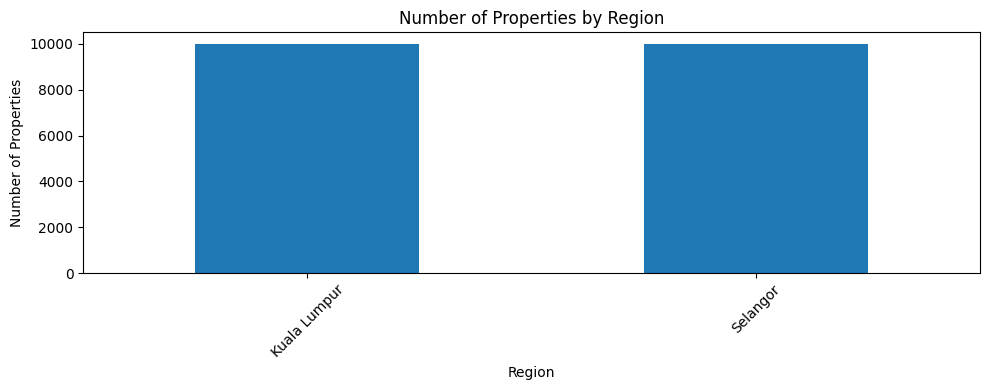

In [386]:
property_counts = df['region'].value_counts().sort_index()
print(property_counts)
plot_barv(property_counts, 'Number of Properties by Region', 'Region', 'Number of Properties', 10, 4)

### Numerical Feature Analysis

- `monthly_rent`: unable to visualize due to string format
- `size`: unable to visualize due to string format
- `monthly_rent` vs `completion_year`: unable to visualize due to string format

### Categorical Feature Analysis

Relationships between Categorical features and `monthly_rent`: unable to visualize due to string format

`parking` - `property_type`

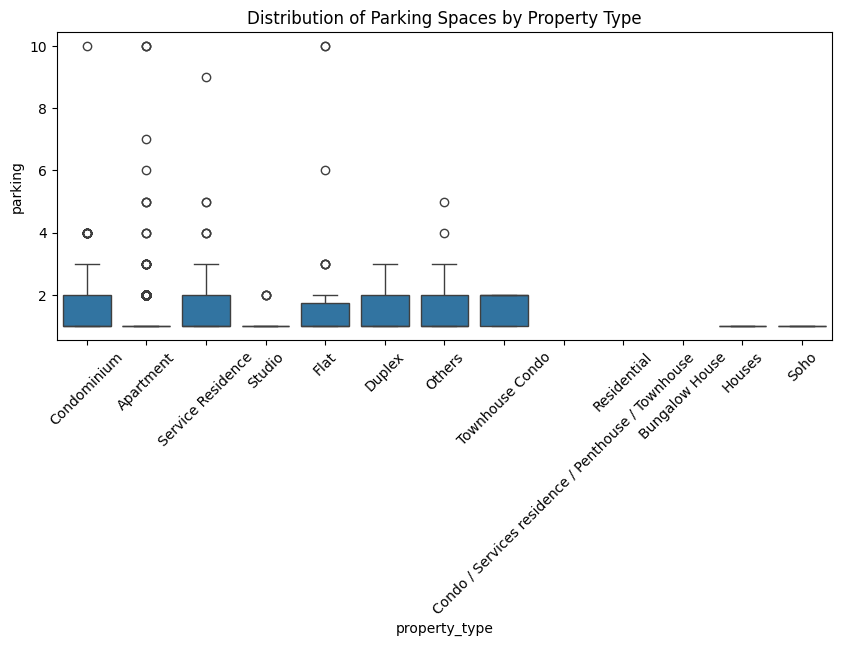

In [444]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='property_type', y='parking', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Parking Spaces by Property Type')
plt.show()

In [450]:
parking_stats = df.groupby('property_type')['parking'].agg(
    mode=lambda x: x.mode()[0] if not x.mode().empty else None,
    median='median',
    mean='mean'
)
print(parking_stats)

                                                    mode  median      mean
property_type                                                             
Apartment                                            1.0     1.0  1.258663
Bungalow House                                       NaN     NaN       NaN
Condo / Services residence / Penthouse / Townhouse   NaN     NaN       NaN
Condominium                                          1.0     1.0  1.468301
Duplex                                               1.0     1.0  1.368421
Flat                                                 1.0     1.0  1.457627
Houses                                               1.0     1.0  1.000000
Others                                               1.0     1.0  1.583333
Residential                                          NaN     NaN       NaN
Service Residence                                    1.0     1.0  1.467304
Soho                                                 1.0     1.0  1.000000
Studio                   

# Data Preprocessing

## Data Cleaning (1)
Preliminary data cleaning to kickstart preprocessing

### Drop Duplicates
Drop duplicate rows based on `ads_id`

In [713]:
df_dropdupe = df.drop_duplicates(subset=['ads_id'], keep='first')

print(f'Number of rows after duplicates dropped: {len(df_dropdupe)}')
print(f'Number of unique rows: {df_dropdupe['ads_id'].nunique()}')
print(f'Number of duplicate rows: {df_dropdupe.duplicated().sum()}')

Number of rows after duplicates dropped: 19978
Number of unique rows: 19978
Number of duplicate rows: 0


### Drop Columns
Drop irrelevant columns
- `ads_id`: does not contribute to `monthly_rent`
- `prop_name`: too specific

In [714]:
df_dropcol = df_dropdupe.drop(columns=['ads_id', 'prop_name'])
df_dropcol

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...,...,...
19986,NaN,RM 1 200 per month,Selangor - Kajang,Apartment,3.0,NaN,2.0,1000 sq.ft.,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpos...",Near KTM/LRT,Selangor
19987,2018.0,RM 1 300 per month,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427 sq.ft.,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",Selangor
19988,NaN,RM 1 350 per month,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270 sq.ft.,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor
19989,NaN,RM 1 200 per month,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100 sq.ft.,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Washing Machine",Selangor


### Handle Missing Values (1)

#### Drop Rows
Drop rows by column value if only a small number of rows are affected
- `monthly_rent`: only 2 rows
- `rooms`: only 6 rows
- `bathroom`: only 6 rows
- `furnished`: only 5 rows

In [720]:
df_dropnan = df_dropcol.dropna(subset=['monthly_rent', 'rooms', 'bathroom', 'furnished'])
df_dropnan.isna().sum()

completion_year          9172
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                  5693
bathroom                    0
size                        0
furnished                   0
facilities               2205
additional_facilities    5940
region                      0
dtype: int64

## Feature Engineering (1)
Preliminary feature engineering where we focus on converting numerical features into appropriate format

In [854]:
df_feng1 = df_dropnan.copy()
df_feng1.dtypes

completion_year          float64
monthly_rent              object
location                  object
property_type             object
rooms                     object
parking                  float64
bathroom                 float64
size                      object
furnished                 object
facilities                object
additional_facilities     object
region                    object
dtype: object

#### `completion_year`
Tasks:
- Convert from float64 to Int16 (nullable)
- Create `age` column

NOTE: Needs cleaning to remove NaNs

In [867]:
# End result should be same as this
print(df_feng1['completion_year'].nunique())
print(df_feng1['completion_year'].unique())

42
<IntegerArray>
[2022, <NA>, 2020, 2018, 2014, 2019, 2017, 2021, 2006, 2015, 1999, 2004, 2007,
 2002, 1985, 2010, 2012, 1988, 1998, 2023, 1990, 2016, 2003, 2000, 2008, 1995,
 2013, 2011, 1994, 2009, 1996, 2005, 1993, 1997, 2001, 2025, 1980, 1989, 1987,
 1984, 2024, 1991, 1977]
Length: 43, dtype: Int16


In [868]:
df_feng1['completion_year'] = df_feng1['completion_year'].astype('Int16')

# Get current year
current_year = datetime.now().year

df_feng1['age'] = current_year - df_feng1['completion_year']
print(df_feng1['age'].nunique())
print(df_feng1['age'].unique())

42
<IntegerArray>
[   2, <NA>,    4,    6,   10,    5,    7,    3,   18,    9,   25,   20,   17,
   22,   39,   14,   12,   36,   26,    1,   34,    8,   21,   24,   16,   29,
   11,   13,   30,   15,   28,   19,   31,   27,   23,   -1,   44,   35,   37,
   40,    0,   33,   47]
Length: 43, dtype: Int16


#### `monthly_rent`
Convert from string format to int32

In [869]:
# Sanity check
df_feng1.dtypes

completion_year            Int16
monthly_rent              object
location                  object
property_type             object
rooms                     object
parking                  float64
bathroom                 float64
size                      object
furnished                 object
facilities                object
additional_facilities     object
region                    object
age                        Int16
dtype: object

In [870]:
# End result should be same as this
print(df_feng1['monthly_rent'].nunique())
print(df_feng1['monthly_rent'].unique())

386
['RM 4 200 per month' 'RM 2 300 per month' 'RM 1 000 per month'
 'RM 1 700 per month' 'RM 1 299 per month' 'RM 1 500 per month'
 'RM 2 900 per month' 'RM 1 550 per month' 'RM 1 400 per month'
 'RM 1 350 per month' 'RM 2 600 per month' 'RM 2 000 per month'
 'RM 1 300 per month' 'RM 3 200 per month' 'RM 2 500 per month'
 'RM 1 800 per month' 'RM 1 099 per month' 'RM 1 199 per month'
 'RM 1 100 per month' 'RM 1 750 per month' 'RM 1 900 per month'
 'RM 2 400 per month' 'RM 4 500 per month' 'RM 3 000 per month'
 'RM 1 600 per month' 'RM 2 100 per month' 'RM 1 850 per month'
 'RM 2 700 per month' 'RM 7 000 per month' 'RM 900 per month'
 'RM 7 800 per month' 'RM 850 per month' 'RM 1 650 per month'
 'RM 1 200 per month' 'RM 2 599 per month' 'RM 2 200 per month'
 'RM 700 per month' 'RM 1 399 per month' 'RM 1 450 per month'
 'RM 3 300 per month' 'RM 3 700 per month' 'RM 999 per month'
 'RM 2 499 per month' 'RM 4 000 per month' 'RM 1 948 per month'
 'RM 550 per month' 'RM 1 488 per month' 'RM

NOTE: Outliers found

In [871]:
def clean_rent(rent):
    # Remove "RM", "per month", and whitespace, then convert to int
    return int(rent.replace('RM', '').replace('per month', '').replace(' ', ''))

# Remove words and convert to int32
df_feng1['monthly_rent'] = df_feng1['monthly_rent'].apply(clean_rent).astype('int32')

print(df_feng1['monthly_rent'].nunique())
print(sorted(df_feng1['monthly_rent'].unique().tolist()))

386
[70, 80, 90, 100, 110, 120, 145, 150, 180, 190, 200, 220, 250, 260, 270, 280, 290, 300, 350, 370, 380, 390, 400, 430, 450, 460, 480, 499, 500, 530, 549, 550, 580, 599, 600, 601, 602, 603, 604, 605, 620, 630, 645, 648, 649, 650, 656, 658, 660, 670, 680, 689, 690, 695, 698, 699, 700, 701, 705, 710, 720, 722, 723, 730, 740, 746, 748, 749, 750, 760, 770, 780, 790, 798, 799, 800, 801, 810, 820, 824, 830, 849, 850, 860, 870, 875, 878, 879, 880, 881, 882, 883, 884, 885, 889, 890, 898, 899, 900, 901, 902, 903, 904, 905, 910, 915, 920, 930, 948, 949, 950, 958, 960, 970, 980, 995, 996, 998, 999, 1000, 1030, 1045, 1048, 1049, 1050, 1070, 1080, 1090, 1098, 1099, 1100, 1109, 1111, 1140, 1150, 1155, 1158, 1180, 1188, 1189, 1190, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1210, 1220, 1230, 1248, 1249, 1250, 1260, 1270, 1280, 1288, 1297, 1298, 1299, 1300, 1330, 1340, 1348, 1350, 1360, 1373, 1380, 1388, 1390, 1398, 1399, 1400, 1430, 1449, 1450, 1480, 1488, 1490, 1498, 1499, 1500, 1501, 1502, 1

#### `rooms`
Convert from string to int8

In [872]:
# Sanity check
df_feng1.dtypes

completion_year            Int16
monthly_rent               int32
location                  object
property_type             object
rooms                     object
parking                  float64
bathroom                 float64
size                      object
furnished                 object
facilities                object
additional_facilities     object
region                    object
age                        Int16
dtype: object

In [873]:
# End result should be same as this
print(df_feng1['rooms'].nunique())
print(df_feng1['rooms'].unique())

18
['5' '3' '2' '1' '4' '7' '6' 'More than 10' '9' '3.0' '4.0' '2.0' '1.0'
 '5.0' '9.0' '6.0' '7.0' '10.0']


In [874]:
def clean_rooms(rooms):
    # Convert "More than 10" to 11
    return float(rooms.replace('More than 10', '11'))

# Remove words and convert to int8
df_feng1['rooms'] = df_feng1['rooms'].apply(clean_rooms).astype('int8')

print(df_feng1['rooms'].nunique())
print(sorted(df_feng1['rooms'].unique().tolist()))

10
[1, 2, 3, 4, 5, 6, 7, 9, 10, 11]


#### `parking`
Convert from float to Int8

In [877]:
# End result should be same as this
print(df_feng1['parking'].nunique())
print(df_feng1['parking'].unique())

9
[ 2.  1. nan  3. 10.  5.  4.  9.  6.  7.]


NOTE: Needs cleaning to remove NaNs

In [882]:
# Convert to Int8
df_feng1['parking'] = df_feng1['parking'].astype('Int8')

print(df_feng1['parking'].nunique())
print(df_feng1['parking'].unique())

9
<IntegerArray>
[2, 1, <NA>, 3, 10, 5, 4, 9, 6, 7]
Length: 10, dtype: Int8


#### `bathroom`

Convert from float to int8

In [883]:
# Sanity check
df_feng1.dtypes

completion_year            Int16
monthly_rent               int32
location                  object
property_type             object
rooms                       int8
parking                     Int8
bathroom                 float64
size                      object
furnished                 object
facilities                object
additional_facilities     object
region                    object
age                        Int16
dtype: object

In [884]:
# End result should be same as this
print(df_feng1['bathroom'].nunique())
print(df_feng1['bathroom'].unique())

8
[6. 2. 1. 3. 5. 4. 7. 8.]


In [885]:
# Convert to int8
df_feng1['bathroom'] = df_feng1['bathroom'].astype('int8')

print(df_feng1['bathroom'].nunique())
print(sorted(df_feng1['bathroom'].unique().tolist()))

8
[1, 2, 3, 4, 5, 6, 7, 8]


#### `size`
Convert `size` from string to int

In [886]:
# Sanity check
df_feng1.dtypes

completion_year           Int16
monthly_rent              int32
location                 object
property_type            object
rooms                      int8
parking                    Int8
bathroom                   int8
size                     object
furnished                object
facilities               object
additional_facilities    object
region                   object
age                       Int16
dtype: object

In [887]:
# End result should be same as this
print(df_feng1['size'].nunique())
print(df_feng1['size'].unique())

1213
['1842 sq.ft.' '1170 sq.ft.' '650 sq.ft.' ... '489 sq.ft.' '941 sq.ft.'
 '1261 sq.ft.']


In [888]:
def clean_size(size):
    # Remove " sq.ft"
    return int(size.replace(' sq.ft.', ''))

# Remove words and convert to int16
df_feng1['size'] = df_feng1['size'].apply(clean_size).astype('int16')

print(df_feng1['size'].nunique())
print(sorted(df_feng1['size'].unique().tolist()))

1213
[-17526, -7937, 1, 2, 3, 5, 7, 13, 20, 40, 50, 54, 59, 60, 80, 85, 88, 90, 100, 104, 111, 116, 120, 130, 150, 160, 175, 180, 182, 200, 220, 238, 239, 240, 245, 250, 252, 260, 277, 280, 282, 300, 301, 305, 320, 325, 340, 341, 344, 345, 350, 351, 358, 359, 360, 363, 366, 370, 374, 380, 382, 384, 385, 390, 400, 404, 406, 410, 411, 416, 418, 420, 421, 425, 429, 430, 431, 435, 436, 438, 439, 440, 441, 442, 446, 447, 448, 449, 450, 452, 454, 455, 456, 458, 460, 461, 462, 463, 464, 465, 466, 468, 470, 471, 472, 473, 475, 477, 478, 480, 481, 482, 483, 484, 485, 486, 488, 489, 490, 493, 494, 495, 499, 500, 501, 502, 503, 504, 505, 506, 508, 510, 511, 512, 514, 515, 516, 517, 518, 520, 521, 522, 525, 526, 527, 528, 529, 530, 531, 533, 535, 536, 538, 539, 540, 541, 544, 545, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 565, 567, 568, 569, 570, 571, 574, 575, 578, 580, 581, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 595, 596, 598, 599, 600, 

NOTE: Outliers found
- 99999999 obviously outlier
- 48010 sqft but only 3 rooms and 2 bathrooms

In [984]:
# Verify outlier sizes
df_temp = df_dropnan.copy()
df_temp['size'] = df_temp['size'].apply(clean_size).astype('int64')
df_temp[df_temp['size'] > 10000]

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
1714,2005.0,RM 110 per month,Kuala Lumpur - Cheras,Condominium,1,10.0,1.0,99999999,Not Furnished,"Security, Tennis Court, Parking, Swimming Pool...",NaN,Kuala Lumpur
2622,2005.0,RM 1 400 per month,Kuala Lumpur - Old Klang Road,Apartment,3,1.0,2.0,48010,Fully Furnished,"Swimming Pool, Parking, Security, Minimart, Li...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
4518,1984.0,RM 3 300 per month,Kuala Lumpur - Bangsar,Condominium,3,1.0,2.0,15000,Fully Furnished,"Parking, Gymnasium, Security, Swimming Pool",NaN,Kuala Lumpur


In [889]:
# Sanity check
df_feng1.dtypes

completion_year           Int16
monthly_rent              int32
location                 object
property_type            object
rooms                      int8
parking                    Int8
bathroom                   int8
size                      int16
furnished                object
facilities               object
additional_facilities    object
region                   object
age                       Int16
dtype: object

## Data Cleaning (2)

### Handle Missing Data (2)

We can see that `completion_year`, `parking`, `facilities`, and `additional_facilities` have huge number of NaNs.\
These will require more thorough analysis to deal with.

In [890]:
df_feng1.isna().sum()

completion_year          9172
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                  5693
bathroom                    0
size                        0
furnished                   0
facilities               2205
additional_facilities    5940
region                      0
age                      9172
dtype: int64

#### `completion_year`

Possibilities of MCAR, MAR, MNAR:
- MCAR: completion_year is left out by listing poster, just because /shrug
- MAR: completion_year might be related to property type. Proportionally, apartments and flats have far more missing values, which might mean that their completion_year is unknown due to their older age
- MNAR: completion_year is just missing because it is simply just unknown, irrelevant to any other features

This shows that properties with missing `completion_year` have lower median `monthly_rent`, which means `completion_year` MAY have an effect on `monthly_rent`

In [891]:
print(f'Overall monthly_rent median: {df_feng1.monthly_rent.median()}')
print(f'Filled CY monthly_rent median: {df_feng1[df_feng1.completion_year.notna()].monthly_rent.median()}')
print(f'Missing CY monthly_rent median: {df_feng1[df_feng1.completion_year.isna()].monthly_rent.median()}')

Overall monthly_rent median: 1400.0
Filled CY monthly_rent median: 1600.0
Missing CY monthly_rent median: 1204.5


In [892]:
print(df_feng1['property_type'].value_counts())
print()
print(df_feng1.completion_year.notna().groupby(df_feng1.property_type).sum())
print()
print(df_feng1.completion_year.isna().groupby(df_feng1.property_type).sum())

property_type
Condominium          8443
Service Residence    5304
Apartment            5255
Flat                  581
Studio                189
Others                 87
Duplex                 76
Townhouse Condo        35
Name: count, dtype: int64

property_type
Apartment            1457
Condominium          5221
Duplex                 60
Flat                   20
Others                 25
Service Residence    3867
Studio                142
Townhouse Condo         6
Name: completion_year, dtype: int64

property_type
Apartment            3798
Condominium          3222
Duplex                 16
Flat                  561
Others                 62
Service Residence    1437
Studio                 47
Townhouse Condo        29
Name: completion_year, dtype: int64


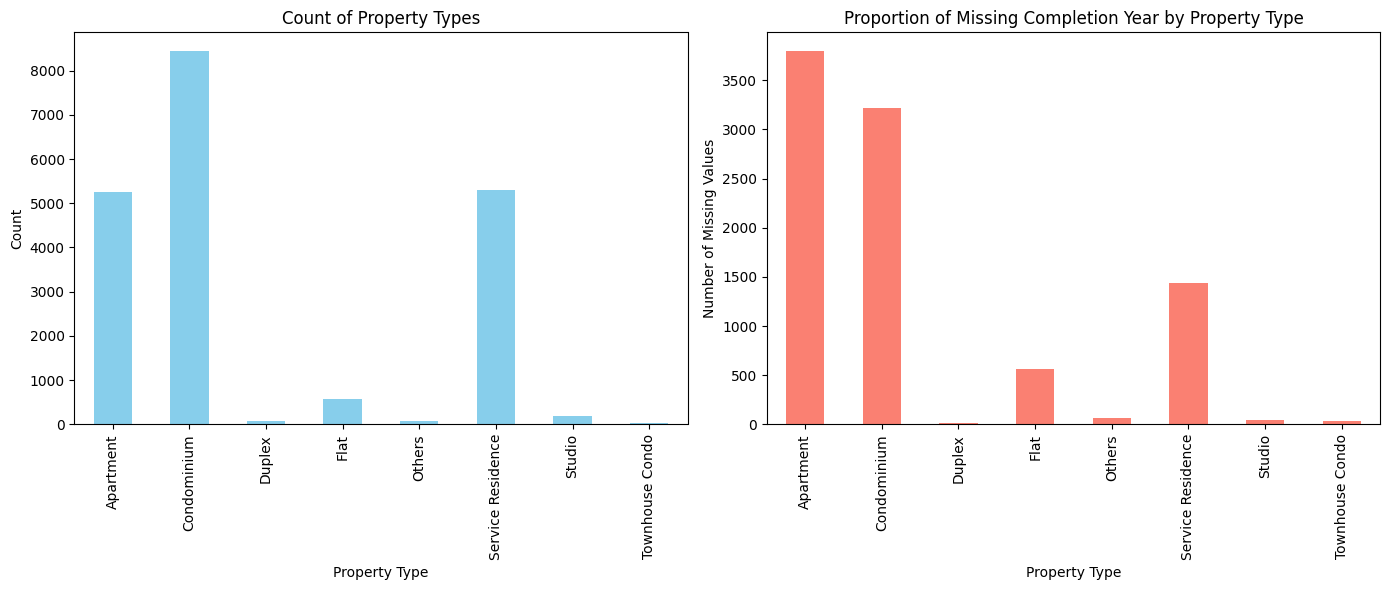

In [893]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# property_type value counts
df_feng1['property_type'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Count of Property Types')
axes[0].set_xlabel('Property Type')
axes[0].set_ylabel('Count')

# Number of missing completion_year by property_type
df_feng1.groupby('property_type')['completion_year'].apply(lambda x: x.isna().sum()).sort_index().plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Proportion of Missing Completion Year by Property Type')
axes[1].set_xlabel('Property Type')
axes[1].set_ylabel('Number of Missing Values')

plt.tight_layout()
plt.show()

##### CHECKPOINT 1
Directly imputing such a huge portion of rows will result in bias. So the more likely options are:
- drop rows with missing `completion_year` (and `age`)
- impute with median, then create a flag/indicator column for missing `completion_year` (this accounts for the relationship between missing `completion_year` and `monthly_rent`)

In [894]:
# Sanity check
df_feng1.isna().sum()

completion_year          9172
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                  5693
bathroom                    0
size                        0
furnished                   0
facilities               2205
additional_facilities    5940
region                      0
age                      9172
dtype: int64

Option 1: Drop rows

In [896]:
df_clean2_1 = df_feng1.copy()

df_clean2_1 = df_clean2_1.dropna(subset=['completion_year', 'age'])
df_clean2_1.isna().sum()

completion_year             0
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                  2569
bathroom                    0
size                        0
furnished                   0
facilities                809
additional_facilities    2974
region                      0
age                         0
dtype: int64

Option 2: Impute with median and create indicator column

In [898]:
df_clean2_2 = df_feng1.copy()

# Add flag column
df_clean2_2['missing_age'] = df_clean2_2['age'].isna().astype('uint8')

# TODO: Impute

print(df_clean2_2['age'].isna().sum())
df_clean2_2

9172


,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,age,missing_age
0,2022,4200,Kuala Lumpur - Taman Desa,Condominium,5,2,6,1842,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,2,0
1,<NA>,2300,Kuala Lumpur - Cheras,Condominium,3,1,2,1170,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur,<NA>,1
2,<NA>,1000,Kuala Lumpur - Taman Desa,Apartment,3,<NA>,2,650,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur,<NA>,1
3,2020,1700,Kuala Lumpur - Sentul,Apartment,2,1,2,743,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,4,0
4,<NA>,1299,Kuala Lumpur - Mont Kiara,Service Residence,1,1,1,494,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur,<NA>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,<NA>,1200,Selangor - Kajang,Apartment,3,<NA>,2,1000,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpos...",Near KTM/LRT,Selangor,<NA>,1
19987,2018,1300,Selangor - Bandar Saujana Putra,Service Residence,4,2,3,1427,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",Selangor,6,0
19988,<NA>,1350,Selangor - Kajang,Condominium,3,2,2,1270,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor,<NA>,1
19989,<NA>,1200,Selangor - Cyberjaya,Service Residence,3,1,2,1100,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Washing Machine",Selangor,<NA>,1


#### `parking`

In [913]:
df_clean2_1['parking'].unique()

<IntegerArray>
[2, 1, <NA>, 3, 10, 5, 9, 4, 7]
Length: 9, dtype: Int8

`parking` value has some outliers, so we impute with median based on property type (although median values are the same as mode so both would work)

In [914]:
# Calculate median parking by property_type
median_parking = df_clean2_1.groupby('property_type')['parking'].median()
print(median_parking)

property_type
Apartment            1.0
Condominium          1.0
Duplex               1.0
Flat                 1.0
Others               1.0
Service Residence    1.0
Studio               1.0
Townhouse Condo      2.0
Name: parking, dtype: Float64


In [939]:
# Sanity check
df_clean2_1[df_clean2_1.parking.isna()]

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,age
10,2019,2600,Kuala Lumpur - Bukit Jalil,Service Residence,2,<NA>,2,868,Partially Furnished,"Parking, Playground, Swimming Pool, Security, ...","Cooking Allowed, Near KTM/LRT",Kuala Lumpur,5
30,2006,1750,Kuala Lumpur - Sentul,Apartment,3,<NA>,2,1065,Partially Furnished,NaN,NaN,Kuala Lumpur,18
41,2007,1800,Kuala Lumpur - Setapak,Condominium,3,<NA>,2,1066,Fully Furnished,NaN,NaN,Kuala Lumpur,17
72,2021,3000,Kuala Lumpur - Cheras,Service Residence,3,<NA>,2,864,Fully Furnished,"Swimming Pool, Barbeque area, Security, Multip...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur,3
82,2010,1700,Kuala Lumpur - Wangsa Maju,Condominium,3,<NA>,3,1267,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Near KTM/LRT, Internet",Kuala Lumpur,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19950,2020,1900,Selangor - Setia Alam,Service Residence,3,<NA>,2,985,Not Furnished,"Playground, Jogging Track, Sauna, Minimart, Li...",Cooking Allowed,Selangor,4
19963,2021,1000,Selangor - Cyberjaya,Studio,1,<NA>,1,450,Fully Furnished,"Security, Parking, Swimming Pool, Playground, ...","Air-Cond, Cooking Allowed, Washing Machine",Selangor,3
19967,2010,850,Selangor - Cheras,Apartment,3,<NA>,2,699,Not Furnished,NaN,Cooking Allowed,Selangor,14
19971,2022,2400,Selangor - Petaling Jaya,Service Residence,2,<NA>,1,670,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Selangor,2


In [941]:
df_impute_parking = df_clean2_1.copy()

# Add flag column
df_impute_parking['missing_parking'] = df_impute_parking['parking'].isna().astype('uint8')
print(df_impute_parking[df_impute_parking.parking.isna()][['parking', 'missing_parking']])

# Impute
df_impute_parking['parking'] = df_impute_parking['parking'].fillna(df_impute_parking.groupby('property_type')['parking'].transform('median'))

df_impute_parking.isna().sum()

       parking  missing_parking
10        <NA>                1
30        <NA>                1
41        <NA>                1
72        <NA>                1
82        <NA>                1
...        ...              ...
19950     <NA>                1
19963     <NA>                1
19967     <NA>                1
19971     <NA>                1
19974     <NA>                1

[2569 rows x 2 columns]


completion_year             0
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                     0
bathroom                    0
size                        0
furnished                   0
facilities                809
additional_facilities    2974
region                      0
age                         0
missing_parking             0
dtype: int64

We can now convert it to int8 (non-nullable)

In [942]:
df_impute_parking['parking'] = df_impute_parking['parking'].astype('int8')

In [943]:
# Sanity check
print(df_impute_parking.dtypes)
print()
print(df_impute_parking['parking'].unique())

completion_year           Int16
monthly_rent              int32
location                 object
property_type            object
rooms                      int8
parking                    int8
bathroom                   int8
size                      int16
furnished                object
facilities               object
additional_facilities    object
region                   object
age                       Int16
missing_parking           uint8
dtype: object

[ 2  1  3 10  5  9  4  7]


In [972]:
def compare_parking_median(parking_vals):
    print('val:    yes | no')
    print('---------------------------------------')
    for val in parking_vals:
        median = df_impute_parking[df_impute_parking.parking == val].monthly_rent.median()
        print(f'{val}: {median}')

compare_parking_median(sorted(df_impute_parking.parking.unique().tolist()))

val:    yes | no
---------------------------------------
1: 1500.0
2: 1800.0
3: 2800.0
4: 2750.0
5: 2200.0
7: 2500.0
9: 1100.0
10: 890.0


In [975]:
df_impute_parking[df_impute_parking.parking == 10]

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,age,missing_parking
1714,2005,110,Kuala Lumpur - Cheras,Condominium,1,10,1,-7937,Not Furnished,"Security, Tennis Court, Parking, Swimming Pool...",NaN,Kuala Lumpur,19,0
11701,2015,890,Selangor - Klang,Apartment,3,10,2,657,Fully Furnished,"Parking, Playground, Minimart, Multipurpose ha...","Cooking Allowed, Near KTM/LRT",Selangor,9,0
14241,2017,1200,Selangor - Kota Damansara,Apartment,3,10,2,800,Partially Furnished,"Jogging Track, Parking, Playground, Minimart, ...","Cooking Allowed, Near KTM/LRT",Selangor,7,0


#### `facilities`

In [965]:
# Sanity check
df_impute_parking.isna().sum()

completion_year             0
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                     0
bathroom                    0
size                        0
furnished                   0
facilities                809
additional_facilities    2974
region                      0
age                         0
missing_parking             0
dtype: int64

Currently in the form of a list of strings. We need to extract unique facilities from the dataset.

In [944]:
# Get all facility lists
facilities = df_impute_parking['facilities']

# Get unique facilities
facilities_series = pd.Series(facilities)
split_facilities = facilities_series.str.split(',').explode().str.strip()
unique_facilities = split_facilities.unique()

# Remove NaN
unique_facilities = unique_facilities[~pd.isna(unique_facilities)]

print(len(unique_facilities))
print(unique_facilities)

14
['Minimart' 'Gymnasium' 'Security' 'Playground' 'Swimming Pool' 'Parking'
 'Lift' 'Barbeque area' 'Multipurpose hall' 'Jogging Track' 'Squash Court'
 'Sauna' 'Club house' 'Tennis Court']


NOTE: Preliminary OHE - create new binary categorical feature for each unique facility

In [1027]:
def to_snake_case(name):
    name = name.lower()
    name = re.sub(r'[\s-]+', '_', name)
    return name

df_ohe_facilities = df_impute_parking.copy()

# Create new columns
for facility in unique_facilities:
    df_ohe_facilities[f'f_{to_snake_case(facility)}'] = df_impute_parking['facilities'].apply(lambda x: 1 if facility in str(x) else 0)

# Verify
facility_cols = ['facilities']
new_facility_cols = []
for i in range(len(unique_facilities)):
    facility_cols.append(f'f_{to_snake_case(unique_facilities[i])}')
    new_facility_cols.append(f'f_{to_snake_case(unique_facilities[i])}')

# Convert to uint8
df_ohe_facilities[new_facility_cols] = df_ohe_facilities[new_facility_cols].astype('uint8')

df_ohe_facilities[facility_cols]

,facilities,f_minimart,f_gymnasium,f_security,f_playground,f_swimming_pool,f_parking,f_lift,f_barbeque_area,f_multipurpose_hall,f_jogging_track,f_squash_court,f_sauna,f_club_house,f_tennis_court
0,"Minimart, Gymnasium, Security, Playground, Swi...",1,1,1,1,1,1,1,1,1,1,0,0,0,0
3,"Parking, Playground, Swimming Pool, Squash Cou...",1,1,1,1,1,1,1,0,0,0,1,0,0,0
7,"Parking, Gymnasium, Playground, Security, Lift...",0,1,1,1,1,1,1,0,1,0,0,0,0,0
8,"Playground, Security, Parking, Lift, Swimming ...",0,0,1,1,1,1,1,0,0,0,0,0,0,0
10,"Parking, Playground, Swimming Pool, Security, ...",0,1,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19981,"Parking, Security, Lift, Swimming Pool, Playgr...",1,1,1,1,1,1,1,1,1,1,1,1,1,1
19983,"Parking, Security, Lift, Swimming Pool, Playgr...",1,1,1,1,1,1,1,1,1,1,0,1,0,0
19985,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19987,"Jogging Track, Barbeque area, Playground, Swim...",0,0,0,1,1,0,0,1,0,1,0,1,0,1


Before we remove the old `facilities` column, we need to impute rows with NaN facilities.\
First, let's check if `facilities` affect `monthly_rent`.

In [1028]:
print(f'Overall monthly_rent median: {df_ohe_facilities.monthly_rent.median()}')
print(f'Filled facilities monthly_rent median: {df_ohe_facilities[df_ohe_facilities.facilities.notna()].monthly_rent.median()}')
print(f'Missing facilities monthly_rent median: {df_ohe_facilities[df_ohe_facilities.facilities.isna()].monthly_rent.median()}')

Overall monthly_rent median: 1600.0
Filled facilities monthly_rent median: 1600.0
Missing facilities monthly_rent median: 1600.0


No clear results. So, we need to check for each facility.\
It seems that facilities do in fact affect rental prices.

NOTE: We will consider >=100 to be impactful in final feature selection later

In [1029]:
def compare_facility_median(new_facility_cols):
    print('facility:    yes | no')
    print('---------------------------------------')
    for facility in new_facility_cols:
        yes_facility_median = df_ohe_facilities[df_ohe_facilities[facility] == 1].monthly_rent.median()
        no_facility_median = df_ohe_facilities[df_ohe_facilities[facility] == 0].monthly_rent.median()
        print(f'{facility} medians: {yes_facility_median} | {no_facility_median}')

compare_facility_median(new_facility_cols)

facility:    yes | no
---------------------------------------
f_minimart medians: 1550.0 | 1600.0
f_gymnasium medians: 1600.0 | 1400.0
f_security medians: 1600.0 | 1500.0
f_playground medians: 1600.0 | 1500.0
f_swimming_pool medians: 1600.0 | 1400.0
f_parking medians: 1600.0 | 1500.0
f_lift medians: 1600.0 | 1600.0
f_barbeque_area medians: 1650.0 | 1500.0
f_multipurpose_hall medians: 1600.0 | 1500.0
f_jogging_track medians: 1600.0 | 1550.0
f_squash_court medians: 1700.0 | 1500.0
f_sauna medians: 1700.0 | 1500.0
f_club_house medians: 1700.0 | 1550.0
f_tennis_court medians: 1700.0 | 1500.0


<Figure size 1000x600 with 0 Axes>

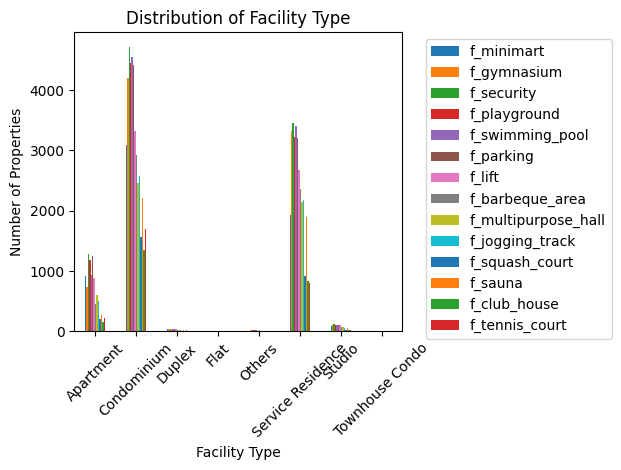

,f_minimart,f_gymnasium,f_security,f_playground,f_swimming_pool,f_parking,f_lift,f_barbeque_area,f_multipurpose_hall,f_jogging_track,f_squash_court,f_sauna,f_club_house,f_tennis_court
property_type,,,,,,,,,,,,,,
Apartment,913,739,1288,1189,929,1254,888,451,600,498,206,269,158,221
Condominium,3091,4206,4722,4457,4545,4422,3318,2931,2456,2583,1562,2207,1355,1693
Duplex,34,36,43,31,35,38,37,22,20,19,14,20,11,17
Flat,11,1,4,14,1,9,5,1,0,2,1,0,1,0
Others,8,18,22,18,17,23,8,17,14,13,4,7,5,4
Service Residence,1936,3315,3448,3222,3402,3209,2668,2358,2146,2175,916,1895,830,810
Studio,86,107,118,103,113,104,111,78,69,64,17,59,21,16
Townhouse Condo,1,2,6,6,3,6,2,3,3,3,0,0,1,0


In [1030]:
property_counts = df_ohe_facilities.groupby('property_type')[new_facility_cols].sum()
plot_barv(property_counts, 'Distribution of Facility Type', 'Facility Type', 'Number of Properties')
property_counts

In [1032]:
df_ohe_facilities[df_ohe_facilities['facilities'].isna()].groupby('property_type').size()

property_type
Apartment             98
Condominium          394
Duplex                15
Flat                   4
Service Residence    279
Studio                19
dtype: int64

Impute missing values for each facility.\
for every property:
- for every facility type:
    - if property's `montly_rent` is >= `median * 0.9` of properties of the same `property_type`:
        - set to 1

In [1033]:
# Get median monthly_rent of every facility by property_type
facility_medians = {}
for facility in new_facility_cols:
    facility_medians[facility] = df_ohe_facilities[df_ohe_facilities[facility] == 1].groupby('property_type').monthly_rent.median()
facility_medians

{'f_minimart': property_type
 Apartment            1300.0
 Condominium          1600.0
 Duplex               1600.0
 Flat                  700.0
 Others                965.0
 Service Residence    1600.0
 Studio               1250.0
 Townhouse Condo      2200.0
 Name: monthly_rent, dtype: float64,
 'f_gymnasium': property_type
 Apartment            1400.0
 Condominium          1700.0
 Duplex               1600.0
 Flat                  600.0
 Others               1040.0
 Service Residence    1650.0
 Studio               1200.0
 Townhouse Condo      2600.0
 Name: monthly_rent, dtype: float64,
 'f_security': property_type
 Apartment            1300.0
 Condominium          1600.0
 Duplex               1600.0
 Flat                  680.0
 Others               1125.0
 Service Residence    1650.0
 Studio               1200.0
 Townhouse Condo      2200.0
 Name: monthly_rent, dtype: float64,
 'f_playground': property_type
 Apartment            1300.0
 Condominium          1600.0
 Duplex         

In [1034]:
df_impute_facilities = df_ohe_facilities.copy()
# Add flag column
df_impute_facilities['missing_facilities'] = df_ohe_facilities['facilities'].isna().astype('uint8')
df_impute_facilities

# Imput missing facility data based on median rent threshold
for index, row in df_impute_facilities.iterrows():
    for facility in new_facility_cols:
        # If facility is missing
        if row.missing_facilities == 1:
            property_type = row.property_type
            # If monthly_rent is >= 90% of the median
            if row.monthly_rent >= (facility_medians[facility].get(property_type, 0) * 0.9):
                df_impute_facilities.at[index, facility] = 1     # Impute facility as 1

In [1062]:
# Sanity check
df_ohe_facilities[df_ohe_facilities.facilities.isna()][['monthly_rent', 'property_type', 'facilities'] + new_facility_cols].tail(5)

,monthly_rent,property_type,facilities,f_minimart,f_gymnasium,f_security,f_playground,f_swimming_pool,f_parking,f_lift,f_barbeque_area,f_multipurpose_hall,f_jogging_track,f_squash_court,f_sauna,f_club_house,f_tennis_court
19862,900,Apartment,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19905,1200,Condominium,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19911,850,Apartment,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19967,850,Apartment,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19985,1500,Service Residence,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1061]:
# Sanity check
df_impute_facilities[df_impute_facilities.facilities.isna()][['monthly_rent', 'property_type', 'facilities'] + new_facility_cols].tail(5)

,monthly_rent,property_type,facilities,f_minimart,f_gymnasium,f_security,f_playground,f_swimming_pool,f_parking,f_lift,f_barbeque_area,f_multipurpose_hall,f_jogging_track,f_squash_court,f_sauna,f_club_house,f_tennis_court
19862,900,Apartment,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19905,1200,Condominium,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19911,850,Apartment,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19967,850,Apartment,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19985,1500,Service Residence,NaN,1,1,1,1,1,1,1,1,1,1,0,0,1,0


#### `additional_facilities`

In [544]:
#Get all additional facility lists
additional_facilities = df_dropnan['additional_facilities']

# Get unique additional_facilities
additional_facilities_series = pd.Series(additional_facilities)
split_additional_facilities = additional_facilities_series.str.split(',').explode().str.strip()
unique_additional_facilities = split_additional_facilities.unique()

# Remove NaN
unique_additional_facilities = unique_additional_facilities[~pd.isna(unique_additional_facilities)  & (unique_additional_facilities != '')]

print(len(unique_additional_facilities))
print(unique_additional_facilities)

5
['Air-Cond' 'Cooking Allowed' 'Washing Machine' 'Near KTM/LRT' 'Internet']


## Feature Engineering (2)

In [217]:
df_feng = df_dropnan.copy()
df_feng.dtypes

completion_year          float64
monthly_rent              object
location                  object
property_type             object
rooms                     object
parking                  float64
bathroom                 float64
size                      object
furnished                 object
facilities                object
additional_facilities     object
region                    object
dtype: object

#### `completion_year`
Convert `completion_year` from float to int, then replace it with `age` feature

In [218]:
# End result should be same as this
print(df_feng['completion_year'].nunique())
print(sorted(df_feng['completion_year'].unique().tolist()))

42
[1977.0, 1980.0, 1984.0, 1985.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2025.0]


In [219]:
df_feng['completion_year'] = df_feng['completion_year'].astype('int16')
print(df_feng['completion_year'].nunique())
print(sorted(df_feng['completion_year'].unique().tolist()))

42
[1977, 1980, 1984, 1985, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


#### `age`

Derive `age` from `completion_year`

In [238]:
current_year = datetime.now().year

df_feng['age'] = current_year - df['completion_year']
df_feng['age'] = df_feng['age'].astype('int16')

print(df_feng['age'].nunique())
print(sorted(df_feng['age'].unique().tolist()))

42
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 44, 47]


Drop `completion_year`

In [239]:
df_feng = df_feng.drop(columns=['completion_year'])
df_feng

,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,age
0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,2
3,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,4
7,RM 1 550 per month,Kuala Lumpur - Ampang,Service Residence,1,1.0,1.0,700 sq.ft.,Fully Furnished,"Parking, Gymnasium, Playground, Security, Lift...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur,6
8,RM 1 400 per month,Kuala Lumpur - Segambut,Apartment,2,1.0,1.0,750 sq.ft.,Fully Furnished,"Playground, Security, Parking, Lift, Swimming ...","Air-Cond, Cooking Allowed, Washing Machine, Ne...",Kuala Lumpur,10
10,RM 2 600 per month,Kuala Lumpur - Bukit Jalil,Service Residence,2,NaN,2.0,868 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Security, ...","Cooking Allowed, Near KTM/LRT",Kuala Lumpur,5
...,...,...,...,...,...,...,...,...,...,...,...,...
19981,RM 1 200 per month,Selangor - Cyberjaya,Service Residence,2.0,1.0,2.0,780 sq.ft.,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor,15
19983,RM 885 per month,Selangor - Cyberjaya,Condominium,3.0,2.0,2.0,1015 sq.ft.,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Near KTM/LRT",Selangor,3
19985,RM 1 500 per month,Selangor - Kajang,Service Residence,2.0,2.0,1.0,455 sq.ft.,Fully Furnished,NaN,Air-Cond,Selangor,5
19987,RM 1 300 per month,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427 sq.ft.,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",Selangor,6


## Data Cleaning (3)

### Remove Outliers

#### `monthly_rent`
This feature has outliers (18,500 jumps to 190,000). Since 190,000 and above are obviously supposed to be sale prices but incorrectly listed as monthly rent, we can remove them.

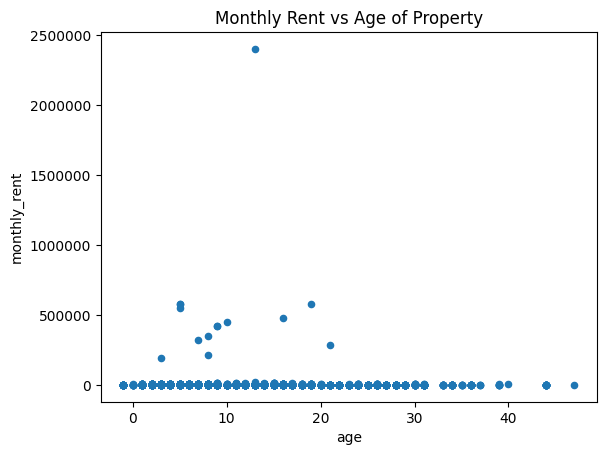

In [284]:
from matplotlib.ticker import ScalarFormatter

ax = df_feng.plot.scatter(x='age', y='monthly_rent')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Monthly Rent vs Age of Property')
plt.show()

In [293]:
df_temp = df_feng.loc[df_feng['monthly_rent'] >= 18500]
df_temp.sort_values(by=['monthly_rent'])

,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,age
8919,18500,Kuala Lumpur - Ampang Hilir,Condominium,4,3.0,6.0,7506 sq.ft.,Partially Furnished,"Security, Barbeque area, Sauna, Playground, Sw...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,13
12128,190000,Selangor - Petaling Jaya,Apartment,3.0,1.0,2.0,852 sq.ft.,Partially Furnished,"Security, Playground, Multipurpose hall, Swimm...","Air-Cond, Cooking Allowed",Selangor,3
17140,215000,Selangor - Seri Kembangan,Service Residence,1.0,1.0,1.0,450 sq.ft.,Partially Furnished,"Gymnasium, Playground, Barbeque area, Parking,...",NaN,Selangor,8
3421,288000,Kuala Lumpur - Setapak,Condominium,3,1.0,2.0,927 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",NaN,Kuala Lumpur,21
18681,320000,Selangor - Semenyih,Condominium,3.0,2.0,2.0,893 sq.ft.,Not Furnished,"Barbeque area, Parking, Playground, Gymnasium,...","Air-Cond, Cooking Allowed, Washing Machine",Selangor,7
12103,349898,Selangor - Semenyih,Condominium,3.0,2.0,2.0,1050 sq.ft.,Partially Furnished,"Squash Court, Gymnasium, Tennis Court, Parking...",Cooking Allowed,Selangor,8
7369,418000,Kuala Lumpur - Ampang,Service Residence,1,1.0,1.0,705 sq.ft.,Partially Furnished,"Gymnasium, Swimming Pool, Multipurpose hall, P...",NaN,Kuala Lumpur,9
7336,419000,Kuala Lumpur - Ampang,Service Residence,1,1.0,1.0,705 sq.ft.,Partially Furnished,"Gymnasium, Multipurpose hall, Barbeque area, P...",NaN,Kuala Lumpur,9
17988,450000,Selangor - Gombak,Service Residence,3.0,2.0,2.0,1001 sq.ft.,Partially Furnished,Parking,Air-Cond,Selangor,10
17065,480000,Selangor - Subang Jaya,Condominium,3.0,2.0,3.0,1346 sq.ft.,Partially Furnished,"Playground, Multipurpose hall, Minimart, Gymna...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Selangor,16
